In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data1=pd.read_csv('C:/Users/mohin/Downloads/twitter_training.csv')
data2=pd.read_csv('C:/Users/mohin/Downloads/twitter_validation.csv')


In [20]:
# Assign column names (assuming the second column is Sentiment and the third column is Text)

data1.columns = ['Column_0','Column_1', 'Sentiment', 'Text'] + [f'Column_{i}' for i in range(4, len(data1.columns))]
data2.columns = ['Column_0','Column_1', 'Sentiment', 'Text'] + [f'Column_{i}' for i in range(4, len(data2.columns))]

# Display the DataFrame with column names
print("\nTraining Data with Column Names:")
print(data1.head())

print("\nValidation Data with Column Names:")
print(data2.head())


Training Data with Column Names:
   Column_0     Column_1 Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                                Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  

Validation Data with Column Names:
   Column_0   Column_1 Sentiment  \
0       352     Amazon   Neutral   
1      8312  Microsoft  Negative   
2      4371      CS-GO  Negative   
3      4433     Google   Neutral   
4      6273       FIFA  Negative   

                                                Text  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it 

In [21]:
data1.shape

(74681, 4)

In [22]:
print(data1.isnull().sum())

Column_0       0
Column_1       0
Sentiment      0
Text         686
dtype: int64


In [23]:
print(data2.isnull().sum())

Column_0     0
Column_1     0
Sentiment    0
Text         0
dtype: int64


In [27]:
data1=data1.dropna()
data1.shape


(71655, 4)

In [25]:
data1=data1.drop_duplicates()


In [26]:
data2=data2.drop_duplicates()

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:

#preprocess data
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Preprocess the text
combined_data=pd.concat([data1,data2],axis=0)
sentiment_counts = combined_data['Sentiment'].value_counts()

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

    return text

combined_data['cleaned_text'] = combined_data['Text'].apply(preprocess_text)









In [30]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mohin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

sentiments = [sia.polarity_scores(tweet)['compound'] for tweet in combined_data['cleaned_text']]
sentiments


[-0.6908,
 -0.6908,
 -0.6908,
 -0.6908,
 -0.6908,
 0.8743,
 0.9237,
 0.7676,
 0.9222,
 0.9222,
 0.0,
 0.7184,
 0.7184,
 0.7184,
 0.7184,
 0.6808,
 0.6908,
 0.0076,
 -0.0183,
 0.513,
 0.4271,
 -0.7939,
 -0.5423,
 -0.5106,
 -0.5423,
 -0.5423,
 -0.5423,
 0.8074,
 0.8658,
 0.765,
 0.8807,
 0.8074,
 0.7003,
 -0.6689,
 -0.6771,
 -0.6689,
 -0.6689,
 -0.6689,
 -0.0772,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1833,
 -0.4847,
 -0.4215,
 0.1833,
 0.0,
 0.122,
 -0.6908,
 -0.5267,
 -0.802,
 -0.6908,
 -0.4287,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4404,
 0.4404,
 0.4404,
 0.4404,
 0.4404,
 0.7906,
 0.6908,
 0.6249,
 0.6908,
 0.6908,
 0.6908,
 0.5106,
 0.25,
 0.25,
 0.25,
 0.25,
 0.6808,
 0.25,
 -0.5423,
 0.0,
 -0.5423,
 -0.5423,
 -0.5423,
 -0.5423,
 -0.4592,
 -0.8979,
 -0.4592,
 -0.1783,
 0.1899,
 0.5719,
 0.5016,
 0.15,
 0.4674,
 0.5016,
 -0.5887,
 -0.2592,
 0.6486,
 0.6486,
 0.5859,
 0.6486,
 0.7579,
 0.7184,
 -0.6278,
 -0.5897,
 -0.5897,
 -0.6278,
 0.34,
 -0.6278,
 0.0,
 -0.4019,
 0.0,
 -0.5574,
 0.0,
 -0.52

In [34]:
combined_data


,Column_0,Column_1,Sentiment,Text,cleaned_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


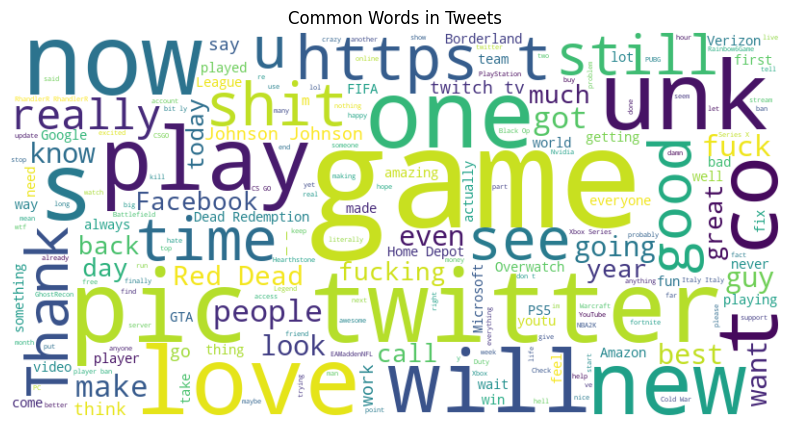

In [38]:
#most frequent word
from wordcloud import WordCloud

# Combine all text from the datasets
all_text = ' '.join(combined_data['Text'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Tweets')
plt.show()

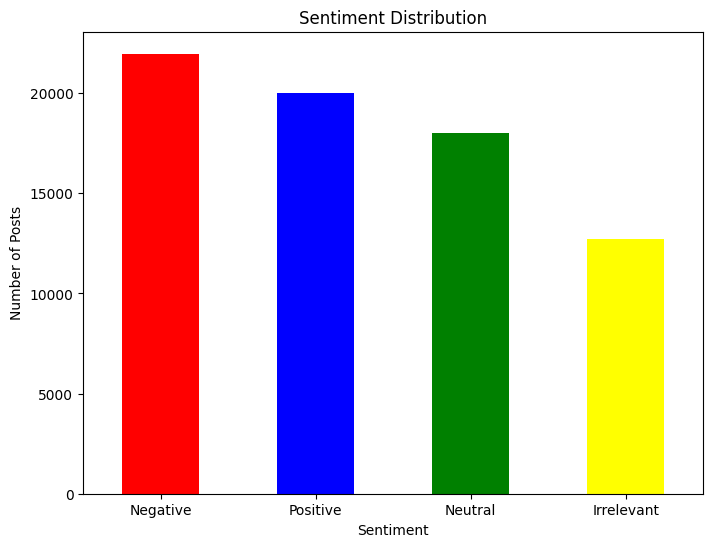

In [37]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green','yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()


In [44]:
positive_tweets = ' '.join(combined_data[combined_data['Sentiment'] == 'Positive']['Text'])
negative_tweets = ' '.join(combined_data[combined_data['Sentiment'] == 'Negative']['Text'])
neutral_tweets = ' '.join(combined_data[combined_data['Sentiment'] == 'Neutral']['Text'])

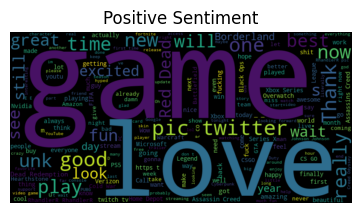

In [45]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
wc_positive = WordCloud(width=800, height=400).generate(positive_tweets)
plt.imshow(wc_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')
plt.show()

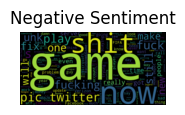

In [46]:
plt.subplot(1, 3, 2)
wc_negative = WordCloud(width=800, height=400).generate(negative_tweets)
plt.imshow(wc_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')
plt.show()

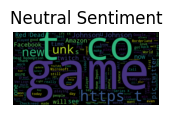

In [47]:
plt.subplot(1, 3, 3)
wc_neutral = WordCloud(width=800, height=400).generate(neutral_tweets)
plt.imshow(wc_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')
plt.show()